In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
data = pd.read_excel('Final_ln_ren_updated1.xlsx')

In [ ]:
# data_test = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v8/v8_val/V8_after_EDA_val.xlsx')

In [5]:
data.columns

Index(['OpportunityID', 'assetpropcountever_value', 'assetpropcountever_flag',
       'assetpropcountcurrent_value', 'assetpropcountcurrent_flag',
       'assetpropstatecountcurrent_value', 'assetpropstatecountcurrent_flag',
       'assetproplotsizetotalever_value', 'assetproplotsizetotalever_flag',
       'assetproplotsizetotalcurrent_value',
       ...
       'Industry_Mining', 'Industry_Retail', 'Industry_Services',
       'Industry_Transportation & Public Utilities', 'Industry_Wholesale',
       'Industry_Wholesale Trade', 'Drop_category_Neutral/Null',
       'Drop_category_Positive', 'LatestMonth_ReturnItemDays_value',
       'LatestMonth_ReturnItemDays_flag'],
      dtype='object', length=667)

In [6]:
# data_test.columns

In [7]:
# data_test = data_test[['OpportunityID', 'Renewal_PreviousPace',
#        'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
#        'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
#        'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
#        'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
#        'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
#        'BankStatement_MA_NumReturnItems', 'Credit_Score__c',
#        'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
#        'AvgMonthlydeposits', 'AvgDailybalance', 'FundedAmount',
#        'Paybackamount', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
#        'WOGross_AdvanceBalance', 'Avg_ReturnItemdays',
#        'LatestMonth_ReturnItemDays', 'PctChangeInReveune',
#        'PctAvgDailybalance2AvgMonthlyDeposits',
#        'Is_this_Business_home_based__c_Yes', 'Industry_Construction',
#        'Industry_E-Commerce', 'Industry_Finance, Insurance, Real Estate',
#        'Industry_Manufacturing', 'Industry_Mining', 'Industry_Retail',
#        'Industry_Services', 'Industry_Transportation & Public Utilities',
#        'Industry_Wholesale', 'Industry_Wholesale Trade']]

In [8]:
data.head(3)

,OpportunityID,assetpropcountever_value,assetpropcountever_flag,assetpropcountcurrent_value,assetpropcountcurrent_flag,assetpropstatecountcurrent_value,assetpropstatecountcurrent_flag,assetproplotsizetotalever_value,assetproplotsizetotalever_flag,assetproplotsizetotalcurrent_value,...,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade,Drop_category_Neutral/Null,Drop_category_Positive,LatestMonth_ReturnItemDays_value,LatestMonth_ReturnItemDays_flag
0,0062M00000gYqZQQA0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0062M00000gYSpGQAW,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0062M00000gYsQcQAK,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [9]:
# data_test.head()

In [10]:
data.shape

(3347, 667)

In [11]:
# data_test.shape

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3347 entries, 0 to 3346
Columns: 667 entries, OpportunityID to LatestMonth_ReturnItemDays_flag
dtypes: float64(62), int64(604), object(1)
memory usage: 17.0+ MB


In [13]:
data.corr()['WriteOff_YN'].sort_values().head(30)

NumberOfBankStatements                -0.345845
sosincorporationtimeoldest_value      -0.111388
Time_in_Business__c                   -0.106365
ucctimeoldest_value                   -0.102060
firmageobserved_value                 -0.100275
inquiryconsumerphone_f2               -0.097845
businessrecordtimeoldest_value        -0.096566
inputaddrtimeoldest_value             -0.094101
Renewal_PreviousPaidPercentageOfRTR   -0.093275
lientimeoldest_value                  -0.088352
Renewal_CountPreviousDeals            -0.085352
Industry_Services                     -0.078270
orglocationcount_value                -0.071592
inputaddrsourcecount_value            -0.070962
lientimenewest_value                  -0.070431
orgsinglelocation_0.0                 -0.069673
inputphonetype_0.0                    -0.069533
associatecurrcountwithprop_value      -0.068366
ucccount_value                        -0.066587
b2bactvfltbalpct_flag                 -0.065819
Credit_Score__c                       -0

In [14]:
data.corr()['WriteOff_YN'].sort_values().tail(30)

b2bactvfltbalpct_value                        0.057866
Renewal_TwoWeekBounces                        0.058134
b2bactvfltworstperfindx_value                 0.059733
inquiryconsumerphone_f3                       0.060492
b2bactvfltbaltotrnge_value                    0.066515
Industry_Transportation & Public Utilities    0.079499
firmreportedsalesrange_-1.0                   0.080503
lienjudgmentdollartotal_flag                  0.084764
outbestnaics_flag                             0.084957
Drop_category_Positive                        0.088072
firmemployeerangecount_-1.0                   0.095467
drop_percent                                  0.100379
FundedWriteOffAmount_Gross                    0.318592
WOGross_AdvanceBalance                        0.362216
WriteOff_YN                                   1.000000
assetaircraftcount_value                           NaN
associatewatchlistcount_value                      NaN
firmownershiptype_f3                               NaN
firmparent

In [15]:
data.drop(labels = ["assetaircraftcount_value",
                     "associatewatchlistcount_value",
                     'firmownershiptype_f3',
                     "firmparentcompanyind_f2",
                     "inquiryconsumeraddress_f1",
                     "lienforeclosurecount_value",
                     "lienforeclosuretotalamount_value",
                     "lientenantcount_value",
                     "lientenanttotalamount_value",
                     "lienothertotalamount_value",
                     "judgmentsothercount_value",
                     "judgmentothertotalamount_value",
                     "orgaddrlegalentitycount_flag",
                     "lienmechanicscount_value",
                     "lienmechanicstotalamount_value"],axis =1, inplace= True)

In [16]:
data.corr()['WriteOff_YN'].sort_values().tail(30)

b2bactvfltcnt_value                           0.047903
b2bactvbaltotrnge_value                       0.048312
b2bactv61pdpdcnt_value                        0.048344
b2bfltpct2y_value                             0.048429
inquiryconsumeraddress_f3                     0.048532
busexeclinkrepaddronfile_0.0                  0.048854
inputphonetype_-1.0                           0.049153
inputphoneresidential_-1.0                    0.049153
inputphoneproblems_-1.0                       0.049153
busexeclinkrepssnonfile_0.0                   0.049901
inquiryconsumerphone_f1                       0.050629
inputphoneentitycount_flag                    0.050629
outbestbusTIN_flag                            0.055602
orgsinglelocation_1.0                         0.055977
b2bactvfltpct_value                           0.056787
b2bactvfltbalpct_value                        0.057866
Renewal_TwoWeekBounces                        0.058134
b2bactvfltworstperfindx_value                 0.059733
inquirycon

In [17]:
data.shape

(3347, 652)

### Model Training

In [ ]:
# X = data.drop(['WriteOff_YN','Industry','Industry_Group__c','OpportunityID',
#               'FundedWriteOffAmount_Net','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyRevenue',
#               'LatestMonth_ReturnItemDays','Avg_ReturnItemdays'],axis = 1)
# y = data['WriteOff_YN']

In [18]:
X = data.drop(['WriteOff_YN','OpportunityID','WOGross_AdvanceBalance','FundedWriteOffAmount_Gross',
              'NumberOfBankStatements','Paybackamount','FundedAmount'],axis = 1)
y = data['WriteOff_YN']

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3347 entries, 0 to 3346
Columns: 645 entries, assetpropcountever_value to LatestMonth_ReturnItemDays_flag
dtypes: float64(58), int64(587)
memory usage: 16.5 MB


In [20]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.20,random_state=102,stratify = y)

In [ ]:
# X_test = data_test.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross',
#               'Paybackamount','FundedAmount', 'WOGross_AdvanceBalance'],axis = 1)
# y_test = data_test['WriteOff_YN']

In [21]:
print('Shape of x_train is: {}'.format(X_train.shape))
print('Shape of x_val is: {}'.format(X_val.shape))
# print('Shape of x_test is: {}'.format(X_test.shape))
print('----------------------------------------------')
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of y_val is: {}'.format(y_val.shape))
# print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (2677, 645)
Shape of x_val is: (670, 645)
----------------------------------------------
Shape of y_train is: (2677,)
Shape of y_val is: (670,)


In [22]:
#checking the skewness of train set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_train).count(1)/len(y_train))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_train).count(0)/len(y_train)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [23]:
#checking the skewness of validation set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_val).count(1)/len(y_val))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_val).count(0)/len(y_val)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [24]:
#checking the skewness of validation set
# print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_test).count(1)/len(y_test))*100)))
# print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_test).count(0)/len(y_test)*100)))

#XGBoost Parameters Explanation


1.   eta - Learning rate - Prevents overfitting - Default = 0.3 - Range = [0,1]
2.   gamma - min_split_loss - Min loss reduction for a further partition - default = 0 - range = [0,infinity] (Higher gamma value means smaller loss reduction which means more splits. As a result, more conservative model,chances of improvement in accuracy.Higher values can also cause overfitting).
3.  lambda - L2 regularisation - default=1 - Higher value means more conservative model, likely to overfit
4. alpha - L1 regularization - default=0 - Higher values lead to more conservative model, likely to overfit 
5. scale_pos_weight - default=1 - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).









In [25]:
quantile_1 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.25)
quantile_1

1158.26

In [26]:
quantile_2 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.5)
quantile_2

3702.01

In [27]:
quantile_3 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.75)
quantile_3

8590.130000000001

In [ ]:
# weight = []
# for i in data.index:
#   if data['WriteOff_YN'][i] == 0:
#     weight.append(1.0)
#   else:
#     if data['WOGross_AdvanceBalance'][i] < quantile_1:
#       weight.append(1.25)
#     elif data['WOGross_AdvanceBalance'][i] >= quantile_1 and data['WOGross_AdvanceBalance'][i] < quantile_2:
#       weight.append(1.5)
#     elif data['WOGross_AdvanceBalance'][i] >= quantile_2 and data['WOGross_AdvanceBalance'][i] < quantile_3:
#       weight.append(2.0)
#     else:
#       weight.append(2.25)

# weight = np.array(weight)
# len(weight)

In [45]:
weight = []
for i in y_train.index:
  if y_train[i] == 0:
    weight.append(1.0)
  else:
    if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
      weight.append(1.25)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
      weight.append(1.5)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
      weight.append(2.0)
    else:
      weight.append(2.25)

weight = np.array(weight)
len(weight)

2677

In [46]:
# data[(data['FundedWriteOffAmount_Gross'] >= quantile_2) & (data['FundedWriteOffAmount_Gross'] < quantile_3)]

In [47]:
# median_WO = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].median()
# median_WO

In [48]:
# weight = []
# for i in data.index:
#   if data['FundedWriteOffAmount_Gross'][i] > median_WO:
#     weight.append(2)
#   else:
#     weight.append(1)
# weight = np.array(weight)
# len(weight)

In [49]:
# L1 = 0
# L2 = 10
# lr = 0.3

In [50]:
parameters = {
    'eval_metric':['aucpr'],
    'use_label_encoder':[False],
    'n_estimators':[1,5,10,15,20,25,30,40], # number of decision trees used in Xgboost model
    'scale_pos_weight': [1,2,3,4,5,6,7,8,9,10], # used to tackle unbalanced datasets(same as upsampling, SMOTE,etc)
    'subsample':[0.3,0.75], # how much % of data you are taking for estimator building.
    'reg_alpha':[0.1],
    'reg_lambda':[1], #perform L2 regularization on leaf weights(tackle overfitting)(control how deep a tree can grow)
    'learning_rate':[0.3], # Learning rate(new weight updation after every epoch in a conservative manner)
    'gamma':[0.25], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'colsample_bynode':[1],
    'min_child_weight':[6] 
} 

In [51]:
from datetime import datetime as dt
start = dt.now()
x_cfl = XGBClassifier(objective='binary:logistic',scale_pos_weight = {1:0.76,0:0.24}) #initializing xgboost model

clf = GridSearchCV(estimator=x_cfl, 
                   param_grid=parameters, 
                   scoring='roc_auc',
                   n_jobs=-1, 
                   cv=5, 
                   return_train_score=True)

clf.fit(X_train,y_train,sample_weight = weight)
running_secs = (dt.now() - start).seconds
running_secs

222

In [52]:
# best parameters after training
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       eval_metric='aucpr', gamma=0.25, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.3, max_delta_step=0,
       max_depth=6, min_child_weight=6, missing=nan,
       monotone_constraints='()', n_estimators=15, n_jobs=8,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=0, reg_alpha=0.1, reg_lambda=1, scale_pos_weight=5,
       subsample=0.75, tree_method='exact', use_label_encoder=False,
       validate_parameters=1, verbosity=None)

In [53]:
clf.best_params_

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'aucpr',
 'gamma': 0.25,
 'learning_rate': 0.3,
 'min_child_weight': 6,
 'n_estimators': 15,
 'reg_alpha': 0.1,
 'reg_lambda': 1,
 'scale_pos_weight': 5,
 'subsample': 0.75,
 'use_label_encoder': False}

In [54]:
# predict_y_test = clf.predict(X_test)
# predict_y_proba_test = clf.predict_proba(X_test)
predict_y_train = clf.predict(X_train)
predict_y_proba_train = clf.predict_proba(X_train)
predict_y_val = clf.predict(X_val)
predict_y_proba_val = clf.predict_proba(X_val)

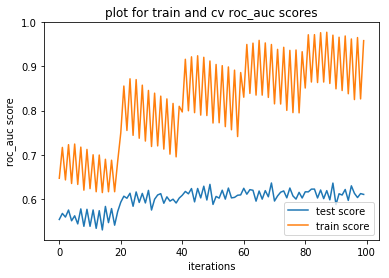

In [55]:
#here test score refers to the cv score
x_axis = [i for i in range(100)]
plt.plot(x_axis,clf.cv_results_['mean_test_score'][:100])
plt.plot(x_axis,clf.cv_results_['mean_train_score'][:100])
plt.legend(["test score", "train score"], loc ="lower right")
plt.xlabel('iterations')
plt.ylabel('roc_auc score')
plt.title('plot for train and cv roc_auc scores')
plt.show()

In [56]:
from sklearn.metrics import precision_score,recall_score

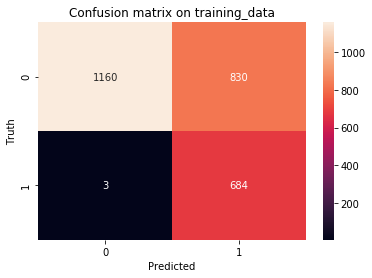

----------------------------
TP: 684
TN: 1160
FP: 830
FN: 3
F1-score: 0.6215356656065425
accuracy: 0.6888307807246918
Precision: 0.45178335535006603
Recall: 0.9956331877729258


In [57]:
# on training data
sns.heatmap(confusion_matrix(y_train,predict_y_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, predict_y_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(predict_y_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_train,predict_y_train)))
print('Recall: {}'.format(recall_score(y_train,predict_y_train)))

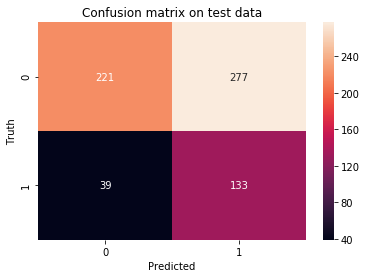

----------------------------
----------------------------
TP: 133
TN: 221
FP: 277
FN: 39
----------------------------
F1-score: 0.4570446735395189
accuracy: 0.5283582089552239
Precision: 0.32439024390243903
Recall: 0.7732558139534884


In [58]:
# on validation set
sns.heatmap(confusion_matrix(y_val,predict_y_val), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_val,predict_y_val).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_val,predict_y_val)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_val,predict_y_val)))
print('Recall: {}'.format(recall_score(y_val,predict_y_val)))

In [59]:
# # on test set 
# sns.heatmap(confusion_matrix(y_test,predict_y_test), annot=True, fmt='d')
# plt.title('Confusion matrix on test data')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()
# print("----------------------------")

# tn, fp, fn, tp = confusion_matrix(y_test,predict_y_test).ravel()
# print("----------------------------")

# print('TP: {}'.format(tp))
# print('TN: {}'.format(tn))
# print('FP: {}'.format(fp))
# print('FN: {}'.format(fn))
# print("----------------------------")

# print('F1-score: {}'.format(f1_score(y_test,predict_y_test)))
# print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
# print('Precision: {}'.format(precision_score(y_test,predict_y_test)))
# print('Recall: {}'.format(recall_score(y_test,predict_y_test)))

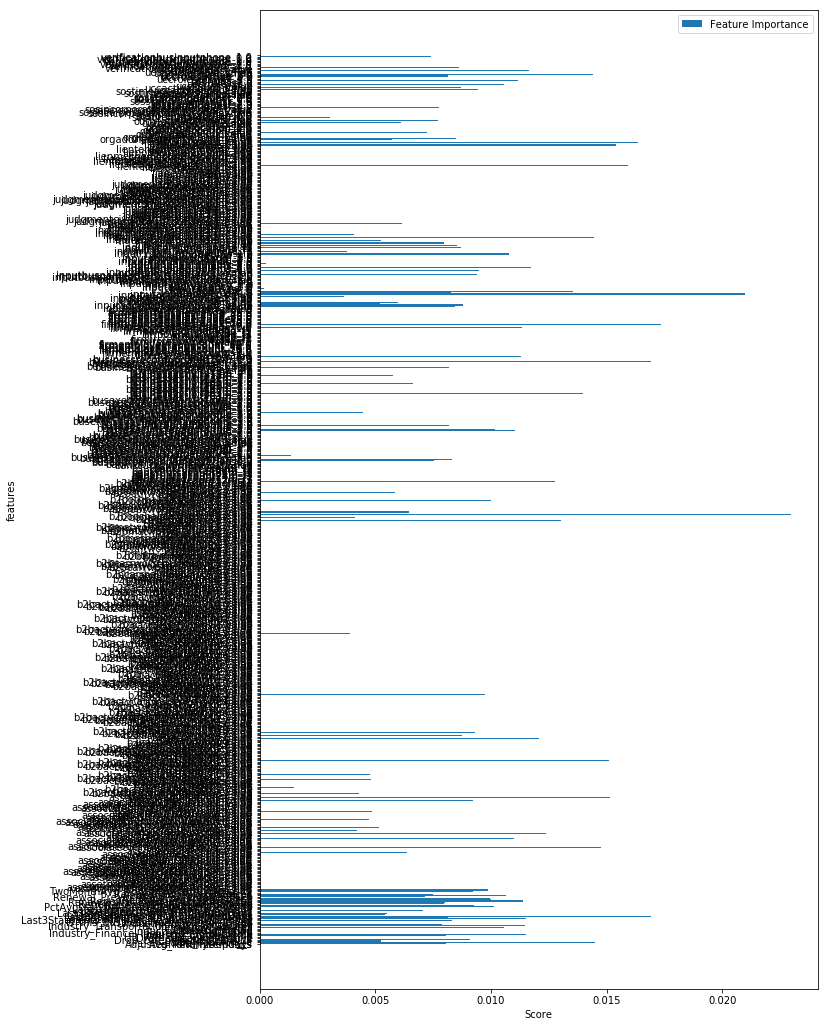

In [60]:
# check for feature importance
features = X_train.columns
features
gain = clf.best_estimator_.feature_importances_
plt.figure(figsize = (10, 18))
plt.barh(features , gain)
plt.xlabel("Score")
plt.ylabel("features")
plt.legend(["Feature Importance"])
plt.show()

In [61]:
feature_importance = pd.DataFrame({'Features':features,'Coefficients':gain})
feature_importance = feature_importance.sort_values(by = 'Coefficients',ascending = False)

In [62]:
feature_importance

,Coefficients,Features
302,0.022973,b2bopsbalmaxmsnc2y_value
458,0.020981,inputaddrtimeoldest_value
403,0.017357,firmreportedsalesrange_10.0
388,0.016940,businessrecordtimeoldest_value
621,0.016900,Last3Statments_MA_NumReturnItems
490,0.016342,lientimeoldest_value
502,0.015916,lienfedtaxcount_value
492,0.015414,lientimenewest_value
35,0.015168,associateliencount_value
268,0.015100,b2bactv61pdpdbaltotpct_value


In [63]:
feature_importance[:100]

,Coefficients,Features
302,0.022973,b2bopsbalmaxmsnc2y_value
458,0.020981,inputaddrtimeoldest_value
403,0.017357,firmreportedsalesrange_10.0
388,0.016940,businessrecordtimeoldest_value
621,0.016900,Last3Statments_MA_NumReturnItems
490,0.016342,lientimeoldest_value
502,0.015916,lienfedtaxcount_value
492,0.015414,lientimenewest_value
35,0.015168,associateliencount_value
268,0.015100,b2bactv61pdpdbaltotpct_value


# For Train data

In [64]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_train)
check

,WriteOff_YN
3089,0
2125,0
780,0
3312,1
3213,1
3291,0
3109,0
1696,0
3179,0
1944,1


In [65]:
check['Predicted Values'] = predict_y_train

In [66]:
check

,WriteOff_YN,Predicted Values
3089,0,0
2125,0,0
780,0,0
3312,1,1
3213,1,1
3291,0,0
3109,0,1
1696,0,0
3179,0,1
1944,1,1


In [67]:
predict_y_proba_train

array([[ 0.7320118 ,  0.26798823],
       [ 0.66353786,  0.33646211],
       [ 0.58641177,  0.41358823],
       ..., 
       [ 0.61668265,  0.38331732],
       [ 0.82483912,  0.17516086],
       [ 0.2212829 ,  0.7787171 ]], dtype=float32)

In [68]:
write_off1 = []
for i in predict_y_proba_train:
  write_off1.append(i[1])


In [69]:
check['Predicted_Prob_WO = 1'] = write_off1

In [70]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
3089,0,0,0.267988
2125,0,0,0.336462
780,0,0,0.413588
3312,1,1,0.928252
3213,1,1,0.929416
3291,0,0,0.384303
3109,0,1,0.609946
1696,0,0,0.138481
3179,0,1,0.723358
1944,1,1,0.863620


In [71]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.966221213341
Min_propability_value:  0.0120818233117


In [72]:
check['OpportunityID'] = None

In [73]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

C:\Users\Siddhant\anaconda3\envs\codebasics_deep_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
3089,0,0,0.267988,0062M00000mTVrOQAW
2125,0,0,0.336462,0062M00000g9zHNQAY
780,0,0,0.413588,0062M00000nX1vCQAS
3312,1,1,0.928252,0062M00000l03MAQAY
3213,1,1,0.929416,0062M00000n1LlWQAU
3291,0,0,0.384303,0062M00000kzSydQAE
3109,0,1,0.609946,0062M00000nYP8nQAG
1696,0,0,0.138481,0062M00000iCo1OQAS
3179,0,1,0.723358,0062M00000kz7bhQAA
1944,1,1,0.863620,0062M00000nZkEwQAK


In [75]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.966221213341
Min_propability_value:  0.0120818233117


Max_Probabilty - 0.89, Min_Probabilty - 0.15 - 0 percentile value
Explaination - In the range of 0 to 1, .89 - 100 percentile value

How deciles are made:
1) 10 deciles are formed based on the distribution of quantiles - we need to break percentile into 10 bins

In [76]:
check['Pentile'] = None

In [77]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5 = 0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5 = 0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5 = 0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.80):
    d=5
#     funded_amt_d5= funded_amt_d5+data['FundedAmount'][i]
#     gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
    d=4
#     funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
#     gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
    d=3
#     funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
#     gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
    d=2
#     funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
#     gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  
  else:
    d = 1
#     funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
#     gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Pentile'][i] = d

C:\Users\Siddhant\anaconda3\envs\codebasics_deep_learning\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
# funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
# gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
# advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0
# for i in check.index:
  
#   if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.90):
#     d=10
#     funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
#     gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.80)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.90)):
#     d=9
#     funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
#     gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.70)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
#     d=8
#     funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
#     gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.70)):
#     d=7
#     funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
#     gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d7 = advanced_amt_d7+ data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.50)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
#     d=6
#     funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
#     gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.50)):
#     d=5
#     funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
#     gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.30)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
#     d=4
#     funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
#     gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.30)):
#     d=3
#     funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
#     gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
#   elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.10)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.20)):
#     d=2
#     funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
#     gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
#   else:
#     d = 1
#     funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
#     gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
#   check['Decile'][i] = d

In [78]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
3089,0,0,0.267988,0062M00000mTVrOQAW,2
2125,0,0,0.336462,0062M00000g9zHNQAY,2
780,0,0,0.413588,0062M00000nX1vCQAS,2
3312,1,1,0.928252,0062M00000l03MAQAY,5
3213,1,1,0.929416,0062M00000n1LlWQAU,5
3291,0,0,0.384303,0062M00000kzSydQAE,2
3109,0,1,0.609946,0062M00000nYP8nQAG,3
1696,0,0,0.138481,0062M00000iCo1OQAS,1
3179,0,1,0.723358,0062M00000kz7bhQAA,4
1944,1,1,0.863620,0062M00000nZkEwQAK,5


In [79]:
check['Predicted_Prob_WO = 1'].max()

0.96622121334075928

In [80]:
check['Predicted_Prob_WO = 1'].quantile(0.8)

0.8270272016525269

In [81]:
len(check[check['Pentile']==5])

536

In [82]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [83]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
882,0,0,0.012082,0062M00000ePyspQAC,1
2123,0,0,0.012477,0062M00000lrL81QAE,1
804,0,0,0.014158,0062M00000oPjv7QAC,1
1763,0,0,0.026133,0062M00000myishQAA,1
510,0,0,0.027189,0062M00000kxG8SQAU,1
1024,0,0,0.028162,0062M00000jzVTKQA2,1
2331,0,0,0.029021,0062M00000jyFYmQAM,1
2375,0,0,0.029129,0062M00000mfyvzQAA,1
904,0,0,0.029529,0062M00000oXxtLQAS,1
1863,0,0,0.030982,0062M00000lr5eRQAQ,1


In [84]:
# this will check nan values, missing_values by itself
check['Pentile'].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [85]:
exp_df = check.copy()

In [86]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
882,0,0,0.012082,0062M00000ePyspQAC,1
2123,0,0,0.012477,0062M00000lrL81QAE,1
804,0,0,0.014158,0062M00000oPjv7QAC,1
1763,0,0,0.026133,0062M00000myishQAA,1
510,0,0,0.027189,0062M00000kxG8SQAU,1
1024,0,0,0.028162,0062M00000jzVTKQA2,1
2331,0,0,0.029021,0062M00000jyFYmQAM,1
2375,0,0,0.029129,0062M00000mfyvzQAA,1
904,0,0,0.029529,0062M00000oXxtLQAS,1
1863,0,0,0.030982,0062M00000lr5eRQAQ,1


In [87]:
len(exp_df[exp_df['Pentile']==1])

536

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [88]:
N = len(exp_df)
N

2677

In [89]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

687

In [90]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Pentile"] == 1]["WriteOff_YN"].value_counts()

0    536
Name: WriteOff_YN, dtype: int64

In [91]:
m_1 = len(exp_df[(exp_df["Pentile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Pentile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Pentile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Pentile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Pentile"] == 5) & (exp_df["WriteOff_YN"] ==1)])

In [92]:
# m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
# m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
# m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
# m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
# m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
# m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
# m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
# m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
# m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
# m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [93]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5

(0, 3, 32, 225, 427)

In [94]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5

In [95]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5

(0, 3, 35, 260, 687)

In [96]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Pentile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Pentile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Pentile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Pentile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Pentile"] == 5])

In [97]:
# # What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# # compute response rate = rr_i = 100*m_i/n
# rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
# rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
# rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
# rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
# rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
# rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
# rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
# rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
# rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
# rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [98]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5) 

0.0 0.5607476635514018 5.981308411214953 42.05607476635514 79.66417910447761


- What is a cummulative gain? - this is being done to check till how many deciles bins - how many % of merchants (i.e. WriteOff_YN = 0) respond in each decile 
- What is gain chart - A Gain Chart can be used to assess what % of merchants respond in each decile. So, rather than targeting customers from lower deciles, 
- customers can be picked up from the top deciles only.
- compute cumulative% of responders  or gain  = cg_i = 100*M_i/P

In [99]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)

In [100]:
print(cg_1,cg_2,cg_3,cg_4,cg_5)

0.0 0.43668122270742354 5.094614264919942 37.84570596797671 100.0


How to interpret Lift :

- If we target the top two deciles, then we would target 20% of the customers. In the same deciles, the cumulative % of responders is 28.3%. Hence, there is a lift of 1.41

- A lift of 1 means there is no gain compared with the no. of customers targeted at random. Lift greater than 1 means the model approach is better than selecting the customers at random.

- Lift - > (dependent on) - Gain - > (dependent on ) - > % responder (response rate)

- In general, the value of lift will go down as we are adding more deciles. Work will be increased. Lift = 1 means - we are considering every sample, so we are not performing every decile analyses 

- The value of lift in case of good model should be high.s

In [101]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(20*1)
lift_2 = cg_2/(20*2)
lift_3 = cg_3/(20*3)
lift_4 = cg_4/(20*4)
lift_5 = cg_5/(20*5)
print(lift_1,lift_2,lift_3,lift_4,lift_5)

0.0 0.010917030567685589 0.0849102377486657 0.4730713245997089 1.0


In [102]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5]

In [103]:
max_range = [exp_df[exp_df['Pentile']==1]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Pentile']==2]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Pentile']==3]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Pentile']==4]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Pentile']==5]['Predicted_Prob_WO = 1'].max()]
max_range_dec = [round(100*i,2) for i in max_range]
max_range

[0.24668960273265839,
 0.46634456515312195,
 0.67156672477722168,
 0.82679140567779541,
 0.96622121334075928]

In [104]:
min_range = [exp_df[exp_df['Pentile']==1]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Pentile']==2]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Pentile']==3]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Pentile']==4]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Pentile']==5]['Predicted_Prob_WO = 1'].min()]
min_range_dec = [round(100*i,2) for i in min_range]
min_range

[0.01208182331174612,
 0.24777840077877045,
 0.4669421911239624,
 0.67162203788757324,
 0.82708615064620972]

In [105]:
avg_range = [exp_df[exp_df['Pentile']==1]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Pentile']==2]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Pentile']==3]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Pentile']==4]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Pentile']==5]['Predicted_Prob_WO = 1'].mean()]
avg_range_dec = [round(100*i,2) for i in avg_range]
avg_range_dec

[14.18, 35.64, 57.28, 75.65, 88.09]

In [106]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5]

In [107]:
no_of_opps = [len(exp_df[exp_df['Pentile']==1]),len(exp_df[exp_df['Pentile']==2]),len(exp_df[exp_df['Pentile']==3]),
              len(exp_df[exp_df['Pentile']==4]),len(exp_df[exp_df['Pentile']==5])]

In [108]:
no_of_opps

[536, 535, 535, 535, 536]

In [109]:
sum(no_of_opps)

2677

In [ ]:
funded_amt

[8555902.79, 12255866.0, 8943437.0, 10037875.0, 15789996.85]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.15392999, 0.22049635, 0.16090216, 0.18059229, 0.28407921])

In [ ]:
gross_amt

[99520.41,
 516531.41000000003,
 501526.04999999993,
 1281877.0100000007,
 3571836.430000001]

In [ ]:
cum_gross_pct = []
for i in range(1,6):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.016666480470201674,
 0.1031689442061402,
 0.1871584908491091,
 0.4018318242122406,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(5):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.011631783628528115,
 0.04214564764334075,
 0.05607755161690074,
 0.12770402201661216,
 0.2262088120682558]

In [111]:
dict_try = {"Pentile": [i for i in range(1,6)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
#             'Funded_$':funded_amt,
#             '%_Funded_$':funded_amt_pct,
#             'Funded_WO_Gross_$':gross_amt,
#             '%_Funded_WO_Gross_$':gross_amt_pct,
#             "Cum_WO_$" :cum_gross_pct,
#             'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,%_Unit_WO,Avg_Score,Cum_Unit_WOs,Max_Score,Min_Score,No_of_Opps,No_of_WOs,Pentile
0,0.000000,14.18,0.000000,24.67,1.21,536,0,1
1,0.560748,35.64,0.436681,46.63,24.78,535,3,2
2,5.981308,57.28,5.094614,67.16,46.69,535,32,3
3,42.056075,75.65,37.845706,82.68,67.16,535,225,4
4,79.664179,88.09,100.000000,96.62,82.71,536,427,5


In [112]:
# final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
# final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
# final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,%_Unit_WO,Avg_Score,Cum_Unit_WOs,Max_Score,Min_Score,No_of_Opps,No_of_WOs,Pentile
0,0.00,14.18,0.00,24.67,1.21,536,0,1
1,0.56,35.64,0.44,46.63,24.78,535,3,2
2,5.98,57.28,5.09,67.16,46.69,535,32,3
3,42.06,75.65,37.85,82.68,67.16,535,225,4
4,79.66,88.09,100.00,96.62,82.71,536,427,5


Analyses from above DataFrame:
- %_Response_Rate - In decile_1 - 100% {231/231} of merchants are captured out of 
total_merchants (231 in that decile) who are likely stable merchants. Same goes with other deciles as well
- Cumulative_Gain - for 10% of merchant base (in each decile) - there are 23 (out of 58) responders (merchants) who are riskier 
- Similarly for 20 % of merchant base (2 deciles) - there are 28.38 % responses who are likely riskier merchants
- Lift - If we target the top 4 deciles, then we would target 40% of the merchants. In the same deciles, the cumulative % of responders is 56.1%. Hence, there is a lift of 1.40

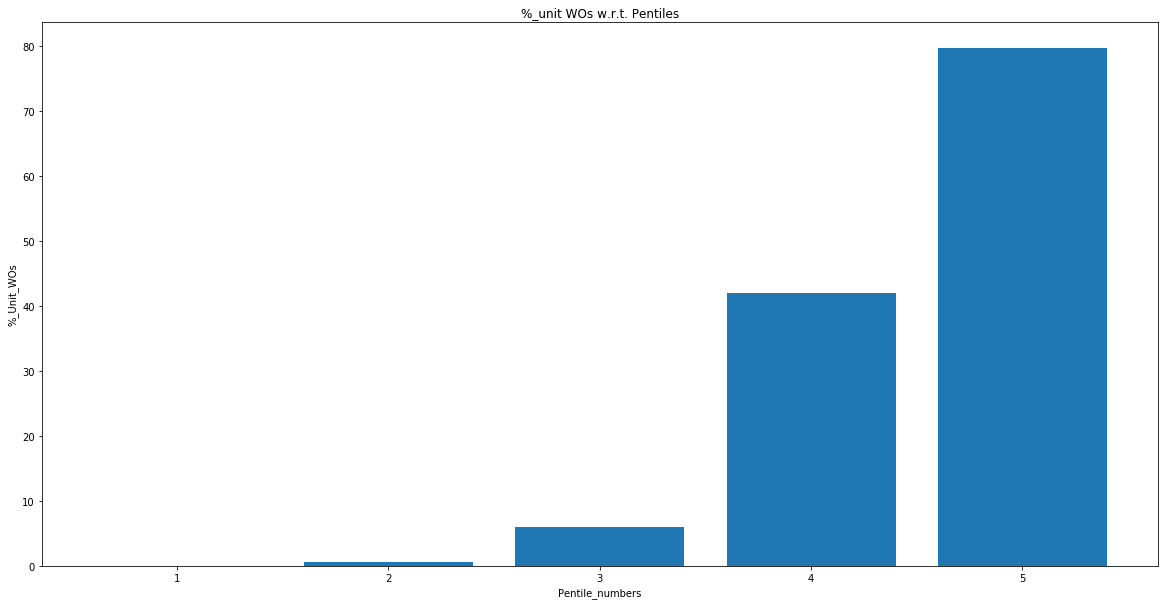

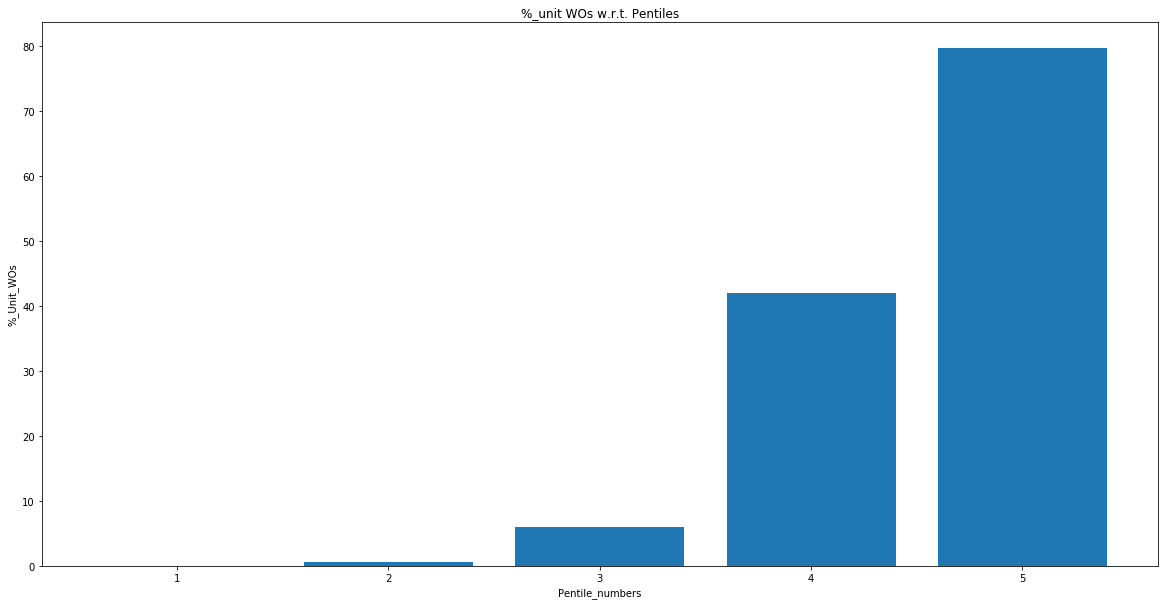

In [114]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Pentiles")
plt.bar(final_df['Pentile'],final_df['%_Unit_WO'])
plt.show()

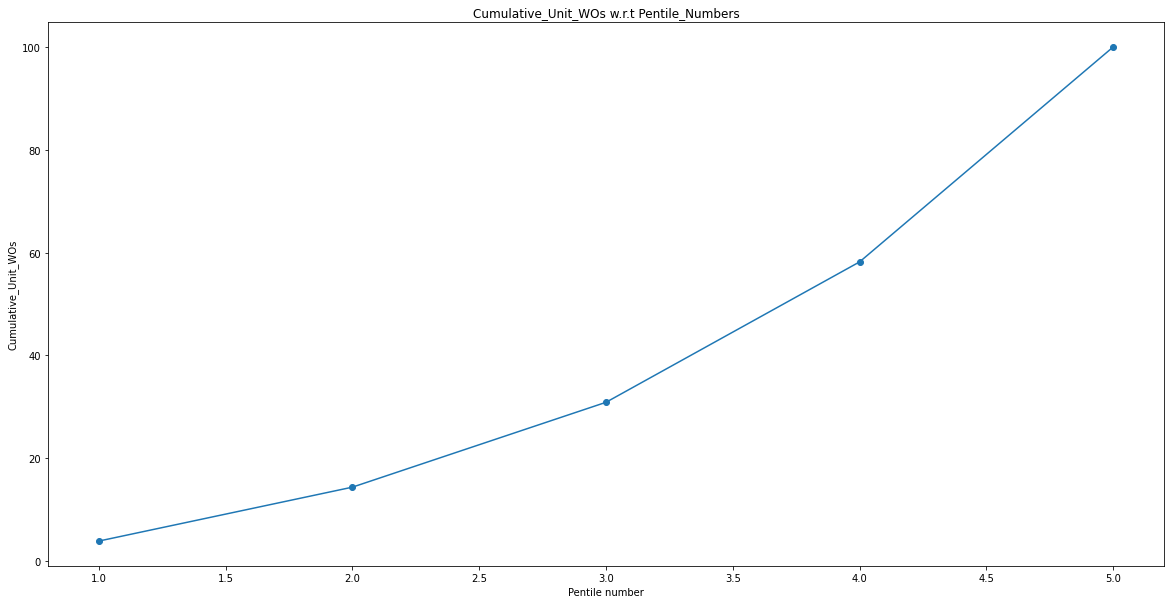

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Pentile_Numbers")
plt.plot(final_df["Pentile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Validation data

In [115]:
#converting this into a dataframe as y_val is a series {we get retained indexes}
check = pd.DataFrame(y_val)
check

,WriteOff_YN
2460,0
1389,0
339,1
457,1
2525,1
1067,0
2689,0
738,1
808,0
1837,0


In [116]:
check['Predicted Values'] = predict_y_val

In [117]:
check

,WriteOff_YN,Predicted Values
2460,0,0
1389,0,0
339,1,1
457,1,0
2525,1,1
1067,0,0
2689,0,0
738,1,0
808,0,1
1837,0,1


In [118]:
predict_y_proba_val

array([[ 0.89871186,  0.10128813],
       [ 0.67496538,  0.32503465],
       [ 0.17956167,  0.82043833],
       ..., 
       [ 0.45390666,  0.54609334],
       [ 0.52186036,  0.47813964],
       [ 0.34357178,  0.65642822]], dtype=float32)

In [119]:
write_off1 = []
for i in predict_y_proba_val:
  write_off1.append(i[1])


In [120]:
check['Predicted_Prob_WO = 1'] = write_off1

In [121]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
2460,0,0,0.101288
1389,0,0,0.325035
339,1,1,0.820438
457,1,0,0.245313
2525,1,1,0.781205
1067,0,0,0.427806
2689,0,0,0.087294
738,1,0,0.174481
808,0,1,0.713221
1837,0,1,0.743823


In [122]:
check['OpportunityID'] = None

In [123]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

C:\Users\Siddhant\anaconda3\envs\codebasics_deep_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [124]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
2460,0,0,0.101288,0062M00000mfxWKQAY
1389,0,0,0.325035,0062M00000nqIwCQAU
339,1,1,0.820438,0062M00000nGdOMQA0
457,1,0,0.245313,0062M00000oPZkRQAW
2525,1,1,0.781205,0062M00000no5fhQAA
1067,0,0,0.427806,0062M00000l0bZ4QAI
2689,0,0,0.087294,0062M00000lsnObQAI
738,1,0,0.174481,0062M00000meEupQAE
808,0,1,0.713221,0062M00000nYeMCQA0
1837,0,1,0.743823,0062M00000mT4H8QAK


In [125]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.948781490326
Min_propability_value:  0.0269000884145


In [126]:
check['Pentile'] = None

In [127]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5 = 0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5 = 0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5 = 0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[4]:
    d=5
#     funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
#     gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
#     funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
#     gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
#     funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
#     gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
#     funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
#     gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
#     funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
#     gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
#     advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Pentile'][i] = d

C:\Users\Siddhant\anaconda3\envs\codebasics_deep_learning\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [128]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
2460,0,0,0.101288,0062M00000mfxWKQAY,1
1389,0,0,0.325035,0062M00000nqIwCQAU,2
339,1,1,0.820438,0062M00000nGdOMQA0,4
457,1,0,0.245313,0062M00000oPZkRQAW,1
2525,1,1,0.781205,0062M00000no5fhQAA,4
1067,0,0,0.427806,0062M00000l0bZ4QAI,2
2689,0,0,0.087294,0062M00000lsnObQAI,1
738,1,0,0.174481,0062M00000meEupQAE,1
808,0,1,0.713221,0062M00000nYeMCQA0,4
1837,0,1,0.743823,0062M00000mT4H8QAK,4


In [129]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [130]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
417,0,0,0.026900,0062M00000lwfDhQAI,1
1222,0,0,0.028926,0062M00000nXQEuQAO,1
1521,0,0,0.037164,0062M00000mdrGHQAY,1
1612,0,0,0.037406,0062M00000jLGqWQAW,1
894,0,0,0.039265,0062M00000lUsX3QAK,1
2820,1,0,0.044876,0062M00000ir5L1QAI,1
3120,0,0,0.051859,0062M00000oYfwKQAS,1
1546,0,0,0.053581,0062M00000jKGsuQAG,1
2778,0,0,0.063890,0062M00000n1fD4QAI,1
2257,0,0,0.066536,0062M00000lvim1QAA,1


In [131]:
# this will check nan values, missing_values by itself
check['Pentile'].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [132]:
exp_df = check.copy()

In [133]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
417,0,0,0.026900,0062M00000lwfDhQAI,1
1222,0,0,0.028926,0062M00000nXQEuQAO,1
1521,0,0,0.037164,0062M00000mdrGHQAY,1
1612,0,0,0.037406,0062M00000jLGqWQAW,1
894,0,0,0.039265,0062M00000lUsX3QAK,1
2820,1,0,0.044876,0062M00000ir5L1QAI,1
3120,0,0,0.051859,0062M00000oYfwKQAS,1
1546,0,0,0.053581,0062M00000jKGsuQAG,1
2778,0,0,0.063890,0062M00000n1fD4QAI,1
2257,0,0,0.066536,0062M00000lvim1QAA,1


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [134]:
N = len(exp_df)
N

670

In [135]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

172

In [136]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Pentile"] == 1]["WriteOff_YN"].value_counts()

0    93
1    11
Name: WriteOff_YN, dtype: int64

In [137]:
m_1 = len(exp_df[(exp_df["Pentile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Pentile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Pentile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Pentile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Pentile"] == 5) & (exp_df["WriteOff_YN"] ==1)])

In [138]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5

(11, 22, 44, 57, 38)

In [139]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5

In [140]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5

(11, 33, 77, 134, 172)

In [141]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Pentile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Pentile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Pentile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Pentile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Pentile"] == 5])

In [142]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5) 

10.576923076923077 16.05839416058394 23.91304347826087 35.625 44.705882352941174


In [143]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)

In [144]:
print(cg_1,cg_2,cg_3,cg_4,cg_5)

6.395348837209303 19.186046511627907 44.76744186046512 77.90697674418605 100.0


In [145]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(20*1)
lift_2 = cg_2/(20*2)
lift_3 = cg_3/(20*3)
lift_4 = cg_4/(20*4)
lift_5 = cg_5/(20*5)

print(lift_1,lift_2,lift_3,lift_4,lift_5)

0.31976744186046513 0.4796511627906977 0.746124031007752 0.9738372093023256 1.0


In [146]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5]

In [147]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5]

In [148]:
no_of_opps = [len(exp_df[exp_df['Pentile']==1]),len(exp_df[exp_df['Pentile']==2]),len(exp_df[exp_df['Pentile']==3]),
              len(exp_df[exp_df['Pentile']==4]),len(exp_df[exp_df['Pentile']==5])]

In [149]:
no_of_opps

[104, 137, 184, 160, 85]

In [150]:
sum(no_of_opps)

670

In [ ]:
funded_amt

[1613850.0, 2889300.0, 2672000.0, 2088866.0, 3396900.0]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.12746708, 0.22820624, 0.21104318, 0.16498538, 0.26829812])

In [ ]:
gross_amt

[100939.53,
 176267.68999999994,
 371467.83999999997,
 178807.48999999996,
 525828.53]

In [ ]:
cum_gross_pct = []
for i in range(1,6):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.07458708606745464,
 0.20483628937701445,
 0.47932442849725276,
 0.6114503621739356,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(5):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.06254579421879357,
 0.061007057072647336,
 0.13902239520958082,
 0.08560026827953539,
 0.1547965880655892]

In [151]:
dict_try = {"Decile": [i for i in range(1,6)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
#             'Funded_$':funded_amt,
#             '%_Funded_$':funded_amt_pct,
#             'Funded_WO_Gross_$':gross_amt,
#             '%_Funded_WO_Gross_$':gross_amt_pct,
#             "Cum_WO_$" :cum_gross_pct,
#             'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,%_Unit_WO,Avg_Score,Cum_Unit_WOs,Decile,Max_Score,Min_Score,No_of_Opps,No_of_WOs
0,10.576923,14.18,6.395349,1,24.67,1.21,104,11
1,16.058394,35.64,19.186047,2,46.63,24.78,137,22
2,23.913043,57.28,44.767442,3,67.16,46.69,184,44
3,35.625000,75.65,77.906977,4,82.68,67.16,160,57
4,44.705882,88.09,100.000000,5,96.62,82.71,85,38


In [152]:
# final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
# final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
# final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,%_Unit_WO,Avg_Score,Cum_Unit_WOs,Decile,Max_Score,Min_Score,No_of_Opps,No_of_WOs
0,10.58,14.18,6.40,1,24.67,1.21,104,11
1,16.06,35.64,19.19,2,46.63,24.78,137,22
2,23.91,57.28,44.77,3,67.16,46.69,184,44
3,35.62,75.65,77.91,4,82.68,67.16,160,57
4,44.71,88.09,100.00,5,96.62,82.71,85,38


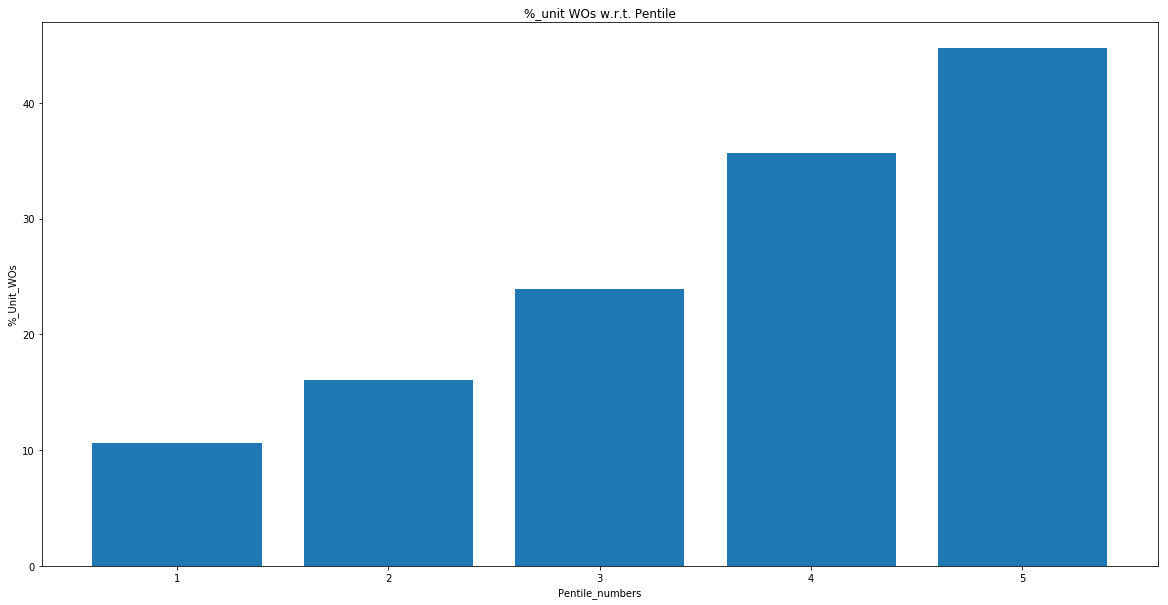

In [154]:
plt.figure(figsize=(20,10))
plt.xlabel("Pentile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Pentile")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])
plt.show()

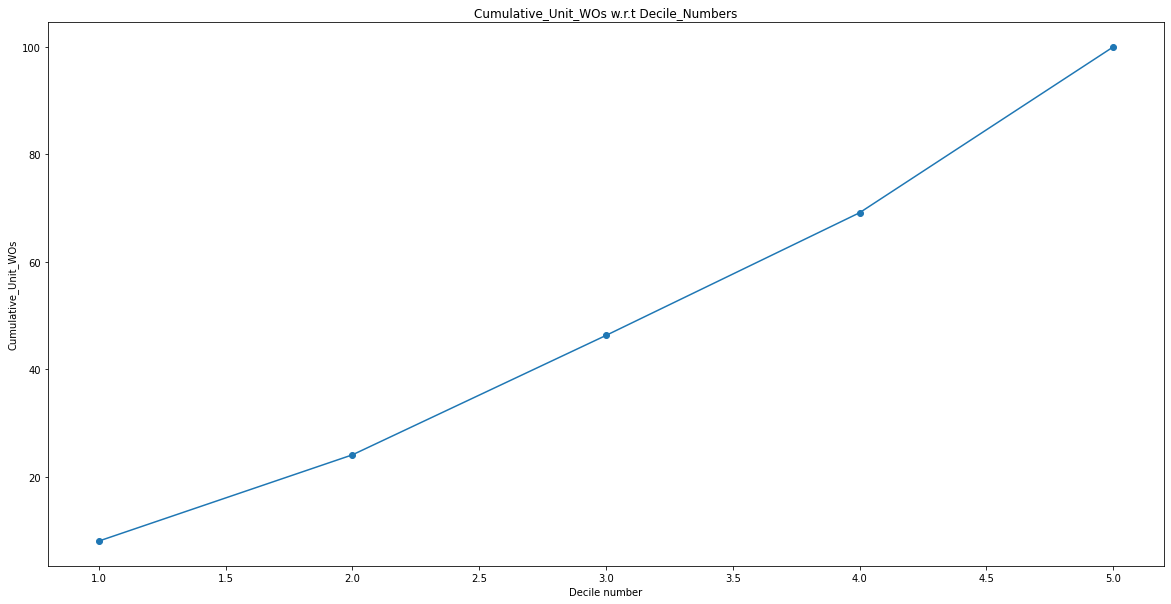

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Test Set

In [ ]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_test)
check

,WriteOff_YN
0,0
1,0
2,0
3,0
4,0
...,...
481,0
482,0
483,0
484,0


In [ ]:
check['Predicted Values'] = predict_y_test

In [ ]:
check

,WriteOff_YN,Predicted Values
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
481,0,1
482,0,1
483,0,1
484,0,1


In [ ]:
print(predict_y_proba_test)

[[0.44616485 0.55383515]
 [0.6932886  0.30671138]
 [0.2225815  0.7774185 ]
 [0.78822064 0.21177937]
 [0.37304676 0.62695324]
 [0.26586002 0.73414   ]
 [0.53570163 0.46429834]
 [0.43983108 0.5601689 ]
 [0.24005508 0.7599449 ]
 [0.42932957 0.5706704 ]
 [0.35767204 0.64232796]
 [0.5123739  0.48762608]
 [0.5140531  0.48594692]
 [0.540426   0.459574  ]
 [0.33621573 0.66378427]
 [0.8448638  0.1551362 ]
 [0.7209916  0.2790084 ]
 [0.30918902 0.690811  ]
 [0.33518285 0.66481715]
 [0.5577638  0.44223616]
 [0.57702494 0.4229751 ]
 [0.8346989  0.16530105]
 [0.4102605  0.5897395 ]
 [0.39762533 0.6023747 ]
 [0.5405735  0.45942652]
 [0.2984367  0.7015633 ]
 [0.59101677 0.4089832 ]
 [0.42409277 0.57590723]
 [0.63165855 0.36834145]
 [0.38019323 0.61980677]
 [0.59572124 0.40427876]
 [0.5740794  0.42592058]
 [0.5393485  0.4606515 ]
 [0.34737074 0.65262926]
 [0.22788924 0.77211076]
 [0.20417571 0.7958243 ]
 [0.71787894 0.2821211 ]
 [0.54731727 0.45268276]
 [0.5643746  0.43562537]
 [0.32240397 0.67759603]


In [ ]:
write_off1 = []
for i in predict_y_proba_test:
  write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
0,0,1,0.553835
1,0,0,0.306711
2,0,1,0.777418
3,0,0,0.211779
4,0,1,0.626953
...,...,...,...
481,0,1,0.706553
482,0,1,0.537832
483,0,1,0.538966
484,0,1,0.607004


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data_test['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
0,0,1,0.553835,0062M00000nqf6oQAA
1,0,0,0.306711,0062M00000nqfF3QAI
2,0,1,0.777418,0062M00000nqjtvQAA
3,0,0,0.211779,0062M00000nqs8FQAQ
4,0,1,0.626953,0062M00000nr94cQAA
...,...,...,...,...
481,0,1,0.706553,0062M00000oYVfWQAW
482,0,1,0.537832,0062M00000oYVWyQAO
483,0,1,0.538966,0062M00000oYYg7QAG
484,0,1,0.607004,0062M00000oYZI3QAO


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.84902894
Min_propability_value:  0.06649036


In [ ]:
check['Pentile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5 = 0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5 = 0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5 = 0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[4]:
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Pentile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
0,0,1,0.553835,0062M00000nqf6oQAA,4
1,0,0,0.306711,0062M00000nqfF3QAI,1
2,0,1,0.777418,0062M00000nqjtvQAA,5
3,0,0,0.211779,0062M00000nqs8FQAQ,1
4,0,1,0.626953,0062M00000nr94cQAA,4
...,...,...,...,...,...
481,0,1,0.706553,0062M00000oYVfWQAW,5
482,0,1,0.537832,0062M00000oYVWyQAO,3
483,0,1,0.538966,0062M00000oYYg7QAG,3
484,0,1,0.607004,0062M00000oYZI3QAO,4


In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
357,0,0,0.066490,0062M00000oPZNNQA4,1
378,0,0,0.080783,0062M00000oQ6ltQAC,1
267,0,0,0.110868,0062M00000oOkeoQAC,1
96,0,0,0.115519,0062M00000o9M0RQAU,1
449,1,0,0.126812,0062M00000oY7tyQAC,1
...,...,...,...,...,...
172,0,1,0.830372,0062M00000oAQHGQA4,5
137,1,1,0.836792,0062M00000oAB6dQAG,5
198,0,1,0.842598,0062M00000oAZGJQA4,5
142,0,1,0.844118,0062M00000oAd2DQAS,5


In [ ]:
# this will check nan values, missing_values by itself
check['Pentile'].unique()

array([1, 2, 3, 4, 5], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Pentile
357,0,0,0.066490,0062M00000oPZNNQA4,1
378,0,0,0.080783,0062M00000oQ6ltQAC,1
267,0,0,0.110868,0062M00000oOkeoQAC,1
96,0,0,0.115519,0062M00000o9M0RQAU,1
449,1,0,0.126812,0062M00000oY7tyQAC,1
...,...,...,...,...,...
172,0,1,0.830372,0062M00000oAQHGQA4,5
137,1,1,0.836792,0062M00000oAB6dQAG,5
198,0,1,0.842598,0062M00000oAZGJQA4,5
142,0,1,0.844118,0062M00000oAd2DQAS,5


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [ ]:
N = len(exp_df)
N

486

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

114

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Pentile"] == 1]["WriteOff_YN"].value_counts()

0    80
1    14
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Pentile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Pentile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Pentile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Pentile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Pentile"] == 5) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5

(14, 17, 25, 27, 31)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5

(14, 31, 56, 83, 114)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Pentile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Pentile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Pentile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Pentile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Pentile"] == 5])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5) 

14.893617021276595 17.346938775510203 26.595744680851062 27.551020408163264 30.392156862745097


In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5)

12.280701754385964 27.192982456140353 49.122807017543856 72.80701754385966 100.0


In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(20*1)
lift_2 = cg_2/(20*2)
lift_3 = cg_3/(20*3)
lift_4 = cg_4/(20*4)
lift_5 = cg_5/(20*5)

print(lift_1,lift_2,lift_3,lift_4,lift_5)

0.6140350877192982 0.6798245614035088 0.8187134502923976 0.9100877192982457 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Pentile']==1]),len(exp_df[exp_df['Pentile']==2]),len(exp_df[exp_df['Pentile']==3]),
              len(exp_df[exp_df['Pentile']==4]),len(exp_df[exp_df['Pentile']==5])]

In [ ]:
no_of_opps

[94, 98, 94, 98, 102]

In [ ]:
sum(no_of_opps)

486

In [ ]:
funded_amt

[2531600.0, 2230160.0, 2635011.8499999996, 2184150.0, 1792012.0]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.22259867, 0.19609364, 0.23169148, 0.19204807, 0.15756814])

In [ ]:
gross_amt

[449892.5299999999,
 309410.67,
 241947.59999999998,
 234809.34999999998,
 205959.56]

In [ ]:
cum_gross_pct = []
for i in range(1,6):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.31198778135979843,
 0.5265553547808303,
 0.6943391917992577,
 0.8571728537607852,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(5):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.17771074814346655,
 0.13873922498834163,
 0.09182030813258013,
 0.10750605498706589,
 0.11493202054450528]

In [ ]:
dict_try = {"Decile": [i for i in range(1,6)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,94,14,14.893617,12.280702,2531600.00,0.222599,449892.53,0.177711,0.311988,1057499.73,27.57,6.77,36.10
1,2,98,17,17.346939,27.192982,2230160.00,0.196094,309410.67,0.138739,0.526555,639187.85,41.50,36.10,46.36
2,3,94,25,26.595745,49.122807,2635011.85,0.231691,241947.60,0.091820,0.694339,447917.33,50.37,46.38,54.10
3,4,98,27,27.551020,72.807018,2184150.00,0.192048,234809.35,0.107506,0.857173,751451.53,58.93,54.14,64.09
4,5,102,31,30.392157,100.000000,1792012.00,0.157568,205959.56,0.114932,1.000000,396982.56,71.45,64.10,88.03


In [ ]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,94,14,14.89,12.28,2531600.00,22.26,449892.53,17.77,31.20,1057499.73,27.57,6.77,36.10
1,2,98,17,17.35,27.19,2230160.00,19.61,309410.67,13.87,52.66,639187.85,41.50,36.10,46.36
2,3,94,25,26.60,49.12,2635011.85,23.17,241947.60,9.18,69.43,447917.33,50.37,46.38,54.10
3,4,98,27,27.55,72.81,2184150.00,19.20,234809.35,10.75,85.72,751451.53,58.93,54.14,64.09
4,5,102,31,30.39,100.00,1792012.00,15.76,205959.56,11.49,100.00,396982.56,71.45,64.10,88.03


<BarContainer object of 5 artists>

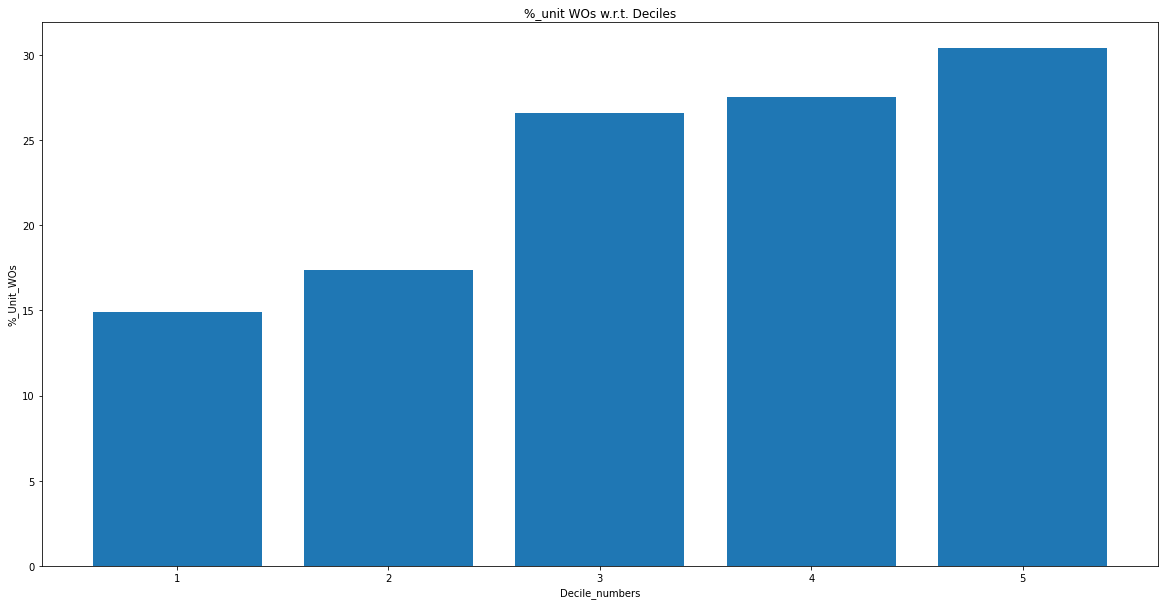

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

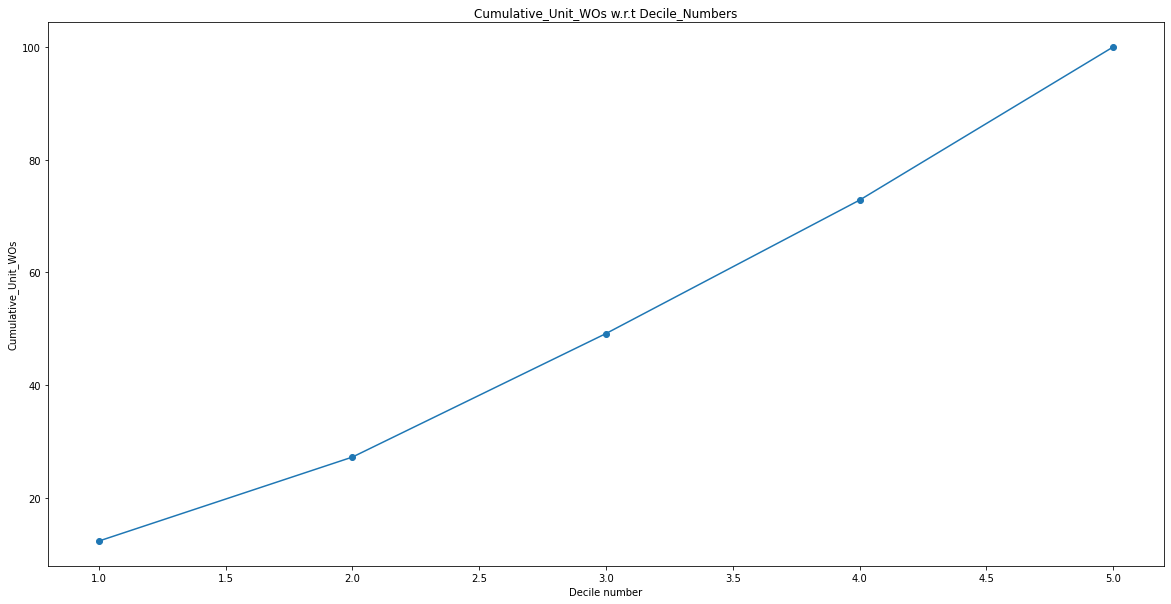

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}